In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import arch 
from arch.univariate import GARCH
from arch import arch_model
from random import gauss
from random import seed
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from arch.univariate import GARCH

%matplotlib inline

Error: Error: Failed to connect to Jupyter notebook. 
http://127.0.0.1:8888/
TypeError: request to http://127.0.0.1:8888/api/contents/?1580653217195 failed, reason: connect EINVAL 127.0.0.1:8888 - Local (0.0.0.0:0)

In [ ]:
from helpers import tickers, data_loader, delete_nans

Error: Error: Failed to connect to Jupyter notebook. 
http://127.0.0.1:8888/
TypeError: request to http://127.0.0.1:8888/api/contents/?1580653133126 failed, reason: connect EINVAL 127.0.0.1:8888 - Local (0.0.0.0:0)

In [10]:
#format: "yyyy-mm-dd"
begin = "2007-01-01"
finish = "2017-01-01"

#data_loader(begin, finish, 'garch_.csv')

*******************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********

In [11]:
#delete_nans('garch_.csv', 'garch.csv')

In [14]:
data_ = pd.read_csv('garch.csv', index_col=0)
data_ = 100*data_
#print(data_)
for n in range(1):
    data = data_.iloc[:,n]
    #print(data)
    n_test = 10
    train, test = data[:-n_test], data[-n_test:]
    squared_data_ = [x**2 for x in data]
    squared_data = np.asarray(squared_data_)
    am = arch_model(data)
    res = am.fit(update_freq=5)
    yhat = res.forecast(horizon=n_test)
    #plotting
    fig = plt.figure(figsize=(40,20))
    ax = fig.add_subplot(211)
    ax = plt.plot(yhat.variance.values[-1, :])
    ax = fig.add_subplot(212)
    ax = plot_acf(squared_data, ax=ax)
    plt.savefig('samp/graphs/graph_{}.png'.format(n))
    #plt.plot()  
data_window = data_.iloc[1:10,1:20]
ax2 = plt.axes()
np.cumprod(data_window, axis=0).plot(ax=ax2, title='cumulative Y-hat variance')
ax2.figure.savefig('samp/graphs/y_hat_variance_all.png')  

Iteration:      5,   Func. Count:     40,   Neg. LLF: 4081.9721845203953
Iteration:     10,   Func. Count:     72,   Neg. LLF: 4081.18456825412
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4081.1845255689627
            Iterations: 11
            Function evaluations: 79
            Gradient evaluations: 11


FileNotFoundError: [Errno 2] No such file or directory: 'samp/graphs/graph_0.png'

In [13]:
print(res)

NameError: name 'res' is not defined

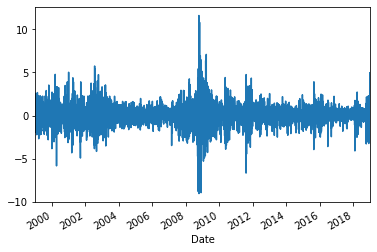

In [2]:
import datetime as dt
import arch.data.sp500

st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)
data = arch.data.sp500.load()
market = data['Adj Close']
returns = 100 * market.pct_change().dropna()
figure = returns.plot()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 6942.15956734673
Iteration:     10,   Func. Count:     72,   Neg. LLF: 6936.71853003242
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6936.718476989003
            Iterations: 11
            Function evaluations: 79
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Sun, Jan 26 2020   Df Residuals:                     5026
Time:           

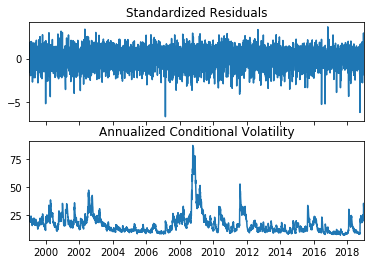

In [4]:
from arch import arch_model

am = arch_model(returns)
res = am.fit(update_freq=5)
print(res.summary())
fig = res.plot(annualize='D')